In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
dataset=pd.read_excel("Superstore_USA.xlsx")
print(dataset)

      Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0      18606  Not Specified      0.01        2.88           0.50            2   
1      20847           High      0.01        2.84           0.93            3   
2      23086  Not Specified      0.03        6.68           6.15            3   
3      23087  Not Specified      0.01        5.68           3.60            3   
4      23088  Not Specified      0.00      205.99           2.50            3   
...      ...            ...       ...         ...            ...          ...   
9421   20275       Critical      0.06       35.89          14.72         3402   
9422   20276       Critical      0.00        3.34           7.49         3402   
9423   24491  Not Specified      0.08      550.98          45.70         3402   
9424   25914           High      0.10      105.98          13.99         3403   
9425   24492  Not Specified      0.09        7.78           2.50         3403   

        Customer Name      

In [409]:
df.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [68]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [76]:
dataset.shape

(9426, 24)

In [66]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean())

0       0.36
1       0.54
2       0.37
3       0.56
4       0.59
        ... 
9421    0.40
9422    0.54
9423    0.71
9424    0.65
9425    0.38
Name: Product Base Margin, Length: 9426, dtype: float64

In [90]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

In [96]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [98]:
dataset['Order Priority']=dataset['Order Priority'].replace("Critical ","Critical")

Order Priority

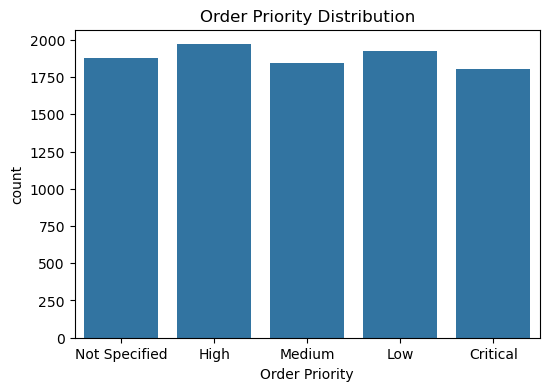

In [546]:
plt.figure(figsize=(6,4))
sns.countplot(x='Order Priority',data=dataset)
plt.title("Order Priority Distribution")
plt.savefig("Count of Order Priority.jpg")
plt.show()

Most orders are "High" or "Low" priority, requiring a balance of quick and flexible fulfillment.

Ship Mode

In [132]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [324]:
x=dataset['Ship Mode'].value_counts().index
y=dataset['Ship Mode'].value_counts().values

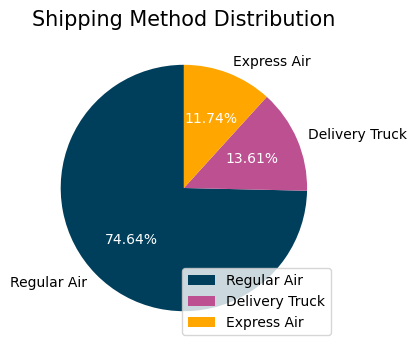

In [584]:
plt.figure(figsize=(4,4))
colors=['#003f5c','#bc5090','#ffa600']
wedges, texts, autotexts=plt.pie(y,labels=x,autopct="%0.2f%%",colors=colors,startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
plt.title("Shipping Method Distribution",size=15)
plt.legend(loc=0)
plt.show()

The pie chart illustrates the distribution of shipping methods used, with "Regular Air" being the most dominant mode at 74.64%, followed by "Delivery Truck" at 13.61%, and "Express Air" at 11.74%. This data suggests that "Regular Air" is the preferred and most frequently utilized shipping method for the majority of shipments.

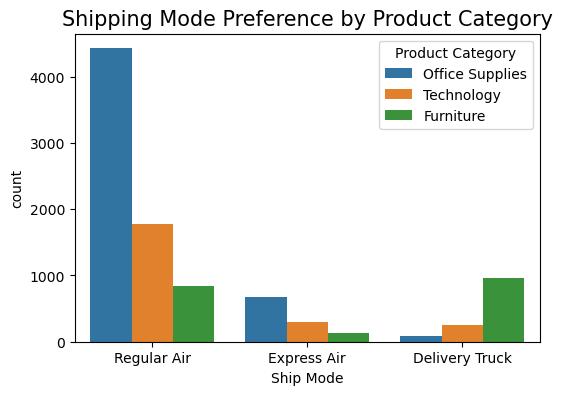

In [582]:
plt.figure(figsize=(6,4))
sns.countplot(x='Ship Mode',data=dataset,hue='Product Category')
plt.title("Shipping Mode Preference by Product Category",size=15)
plt.show()

In this chart we can see that "Regular Air" is the most popular shipping mode across all product categories.Office Supplies have the highest overall shipping volume, with a strong preference for "Regular Air".Technology and Furniture show similar shipping patterns, with "Regular Air" as the primary mode and "Delivery Truck" being used more frequently than "Express Air.

Customer Segment

In [259]:
dataset['Customer Segment'].value_counts()

Customer Segment
Corporate         3375
Home Office       2316
Consumer          1894
Small Business    1841
Name: count, dtype: int64

In [265]:
x=dataset['Customer Segment'].value_counts().index
y=dataset['Customer Segment'].value_counts().values

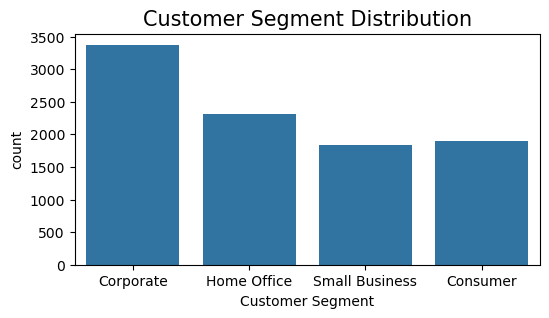

In [580]:
plt.figure(figsize=(6,3))
sns.countplot(x='Customer Segment',data=dataset)
plt.title("Customer Segment Distribution",size=15)
plt.show()

In the above chart we can observe that "Corporate" customers has the largest segment, followed by "Home Office". "Small Business" and "Consumer" segments have similar levels of representation.


Product Category

In [402]:
dataset['Product Category'].value_counts()

Product Category
Office Supplies    5181
Technology         2312
Furniture          1933
Name: count, dtype: int64

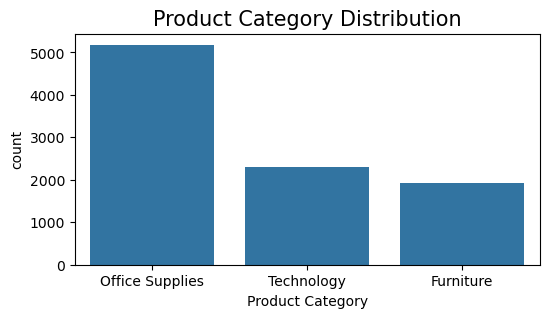

In [576]:
plt.figure(figsize=(6,3))
sns.countplot(x='Product Category',data=dataset)
plt.title("Product Category Distribution",size=15)
plt.show()

The above chart shows that "Office Supplies" is the most frequently ordered product category, followed by "Technology" and then "Furniture."

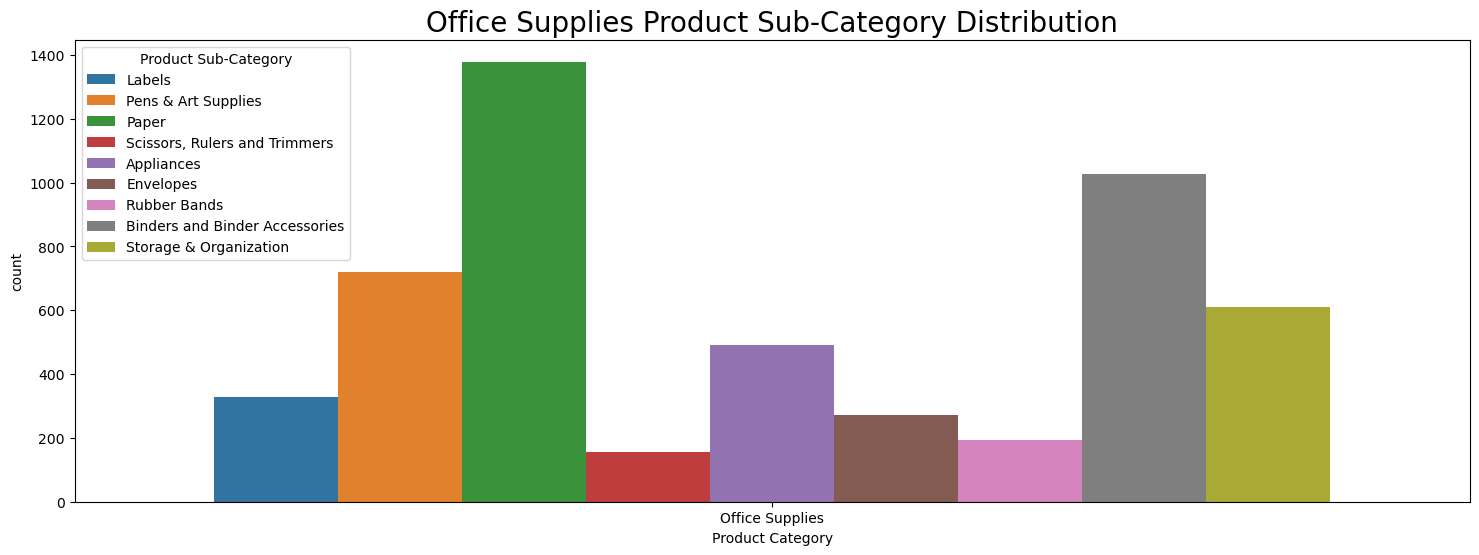

In [570]:
plt.figure(figsize=(18,6))
sns.countplot(x='Product Category',data=dataset[dataset["Product Category"]=="Office Supplies"],hue='Product Sub-Category')
plt.title("Office Supplies Product Sub-Category Distribution",size=20)
plt.show()

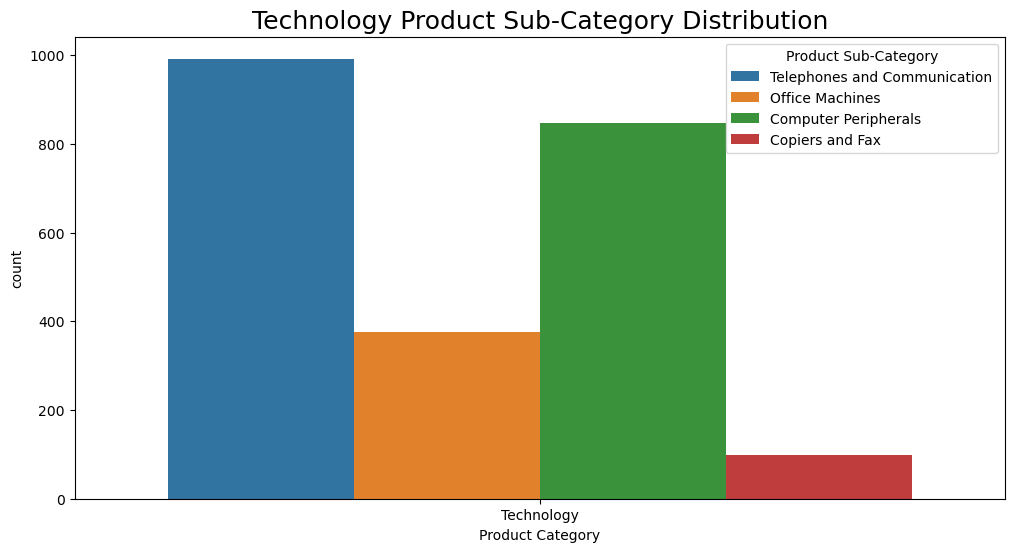

In [588]:
plt.figure(figsize=(12,6))
sns.countplot(x='Product Category',data=dataset[dataset["Product Category"]=="Technology"],hue='Product Sub-Category')
plt.title("Technology Product Sub-Category Distribution",size=18)
plt.show()

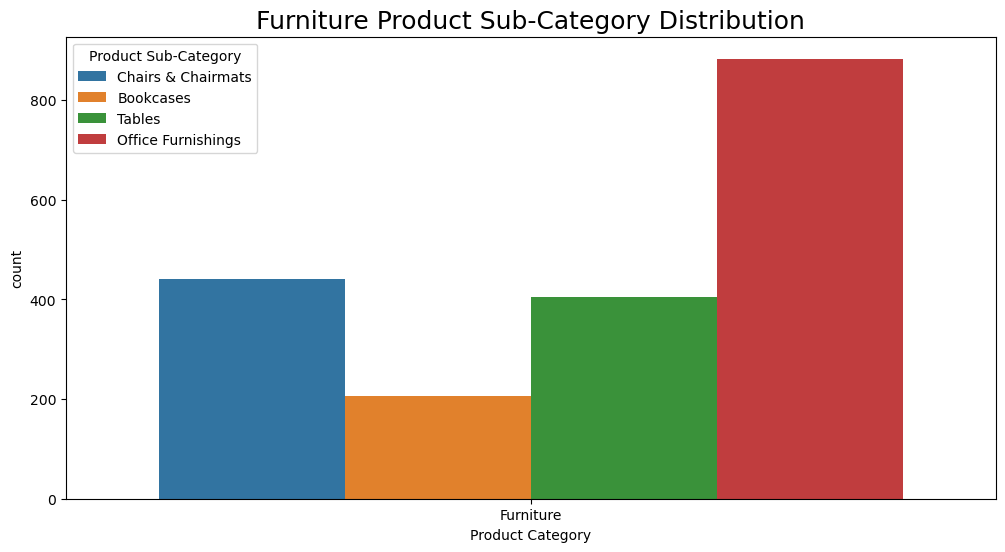

In [590]:
plt.figure(figsize=(12,6))
sns.countplot(x='Product Category',data=dataset[dataset["Product Category"]=="Furniture"],hue='Product Sub-Category')
plt.title("Furniture Product Sub-Category Distribution",size=18)
plt.show()

Order and ship date

In [462]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [466]:
dataset["Order Year"]=dataset['Order Date'].dt.year

In [470]:
dataset["Order Year"].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

ORDER BY YEAR

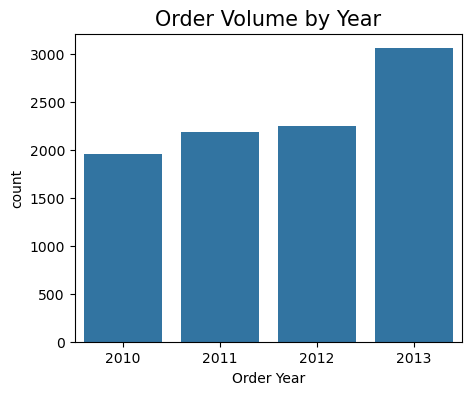

In [599]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Year",data=dataset)
plt.title("Order Volume by Year",size=15)
plt.show()

In the above chart we can see that a steady increase in order volume from 2010 to 2013. This suggests a positive growth trend in the company's sales over this period.

Profit based on Product Category

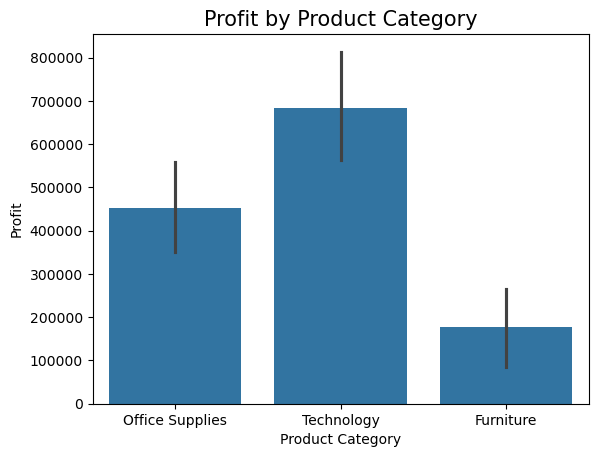

In [602]:
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator='sum')
plt.title("Profit by Product Category",size=15)
plt.show()

IN the above chart we can see that "Technology" category generates significantly higher profits compared to "Office Supplies" and "Furniture." The error bars indicate potential variability in profit within each category.

Sales based on different States

In [502]:
dataset["State or Province"].value_counts()[:5] 

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

Product based margin on Product Category

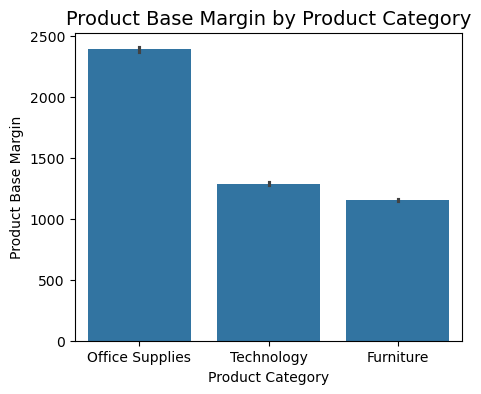

In [612]:
plt.figure(figsize=(5,4))
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,estimator='sum')
plt.title("Product Base Margin by Product Category",size=14)
plt.show()

In the above chart we can see that "Office Supplies" has the highest average product base margin, followed by "Technology" and then "Furniture."